Shape: (224, 224)
Min: 1.38516203086619e-25, Max: 0.9991828263987065
Data type: float64


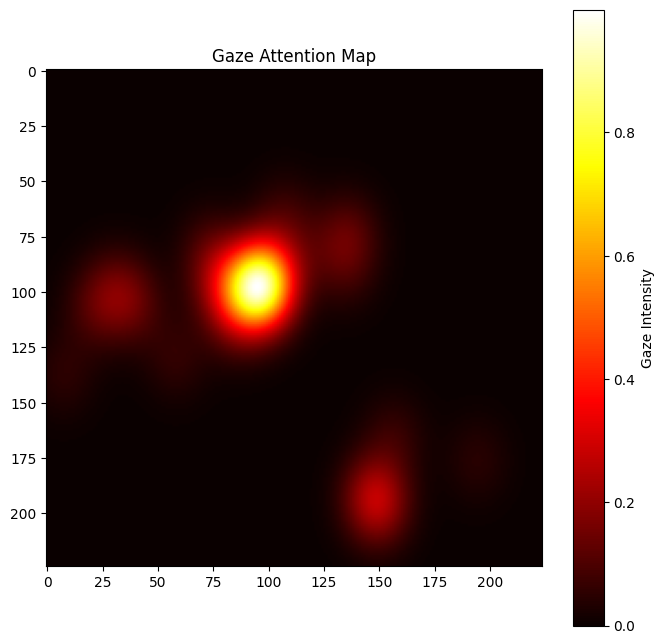

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the gaze attention map
gaze_map = np.load('C:\\disk1\\thesis\\vlm_foveation\\datasets\\VQA_MHUG\\VQA_MHUG\\vqa-mhug-gaze_generated\\vqa-mhug\\img-attmap\\q1000004_p31.npy')

print(f"Shape: {gaze_map.shape}")       # e.g., (224, 224)
print(f"Min: {gaze_map.min()}, Max: {gaze_map.max()}")  # Value range
print(f"Data type: {gaze_map.dtype}")    # e.g., float64

# Visualize the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(gaze_map, cmap='hot')
plt.colorbar(label='Gaze Intensity')
plt.title('Gaze Attention Map')
plt.show()

#### Apply Gaze Map to Image - Overlay

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gaze map and image
gaze_map = np.load('C:\\disk1\\thesis\\vlm_foveation\\datasets\\VQA_MHUG\\VQA_MHUG\\vqa-mhug-gaze_generated\\vqa-mhug\\img-attmap\\q1000004_p31.npy')
image_path = 'path/to/your/image.jpg'  # Find corresponding VQA image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize gaze map to match image size if needed
if gaze_map.shape != image_rgb.shape[:2]:
    from cv2 import resize
    gaze_map = resize(gaze_map, (image_rgb.shape[1], image_rgb.shape[0]))

# Normalize heatmap to 0-255
gaze_normalized = (gaze_map / gaze_map.max() * 255).astype(np.uint8)

# Apply colormap
heatmap_colored = cv2.applyColorMap(gaze_normalized, cv2.COLORMAP_JET)
heatmap_rgb = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

# Overlay on image (alpha blending)
alpha = 0.4
overlay = cv2.addWeighted(image_rgb, 1 - alpha, heatmap_rgb, alpha, 0)

# Display
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[1].imshow(gaze_map, cmap='hot')
axes[1].set_title('Gaze Attention Map')
axes[2].imshow(overlay)
axes[2].set_title('Overlay')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()